# Lesson 1 - Summarizing Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

%matplotlib inline

### Make a blank DataFrame

In [2]:
df = pd.DataFrame()

### Populate it with data

In [3]:
df['age'] = [28, 42, 27, 24, 35, 54, 35, 42, 37]

## Measures of Central Tendency

### Mean (using built-in Python functionality)

In [4]:
mean_py = sum(df['age']) / len(df['age'])

In [5]:
mean_py

36.0

### Mean (using NumPy)

In [6]:
mean_np = np.mean(df['age'])

In [7]:
mean_np

36.0

### Median (using built-in Python functionality)

In [8]:
median_py = statistics.median(df['age'])

In [9]:
median_py

35

### Median (using NumPy)

In [10]:
median_np = np.median(df['age'])

In [11]:
median_np

35.0

### Mode (using built-in Python functionality)

In [12]:
mode_py = statistics.mode(df['age'])

StatisticsError: no unique mode; found 2 equally common values

In [13]:
mode_py

NameError: name 'mode_py' is not defined

### Mode (using NumPy)

In [14]:
# Generate a list of unique elements along with how often they occur.
(values, counts) = np.unique(df['age'], return_counts=True)

In [15]:
print(values, counts)

[24 27 28 35 37 42 54] [1 1 1 2 1 2 1]


In [16]:
# The location(s) in the values list of the most-frequently-occurring element(s).
ind = [x[0] for x in list(enumerate(counts)) if x[1] == counts[np.argmax(counts)]]

In [17]:
ind

[3, 5]

In [18]:
values

array([24, 27, 28, 35, 37, 42, 54])

In [19]:
# The most frequent element(s).
modes = [values[x] for x in ind]

In [20]:
modes

[35, 42]

## Measures of Variance

### Variance (using NumPy)

In [21]:
df['age']

0    28
1    42
2    27
3    24
4    35
5    54
6    35
7    42
8    37
Name: age, dtype: int64

In [22]:
# change delta degrees of freedom (ddof) to 1 from its default value of 0
var_np = np.var(df['age'], ddof=1)

In [23]:
var_np

86.0

### Variance (using Pandas)

In [24]:
var_pd = df['age'].var()

In [25]:
var_pd

86.0

### Standard Deviation (using NumPy)

In [26]:
std_np = np.std(df['age'], ddof=1)

In [27]:
std_np

9.273618495495704

### Standard Deviation (using Pandas)

In [28]:
std_pd = df['age'].std()

In [29]:
std_pd

9.273618495495704

### Standard Error (using NumPy)

In [30]:
se_np = std_np / np.sqrt(len(df['age']))

In [31]:
se_np

3.0912061651652345

### Standard Error Examples

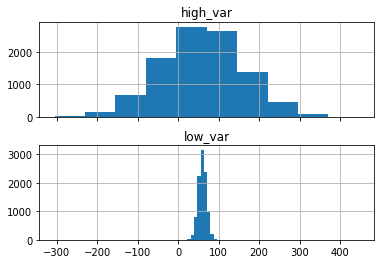


Max of low_var and high_var:
 low_var      95.937705
high_var    446.050769
dtype: float64

Min of low_var and high_var:
 low_var      14.712285
high_var   -304.913887
dtype: float64


In [32]:
# First, create an empty dataframe to store your variables-to-be.
pop = pd.DataFrame()

# Then create two variables with mean = 60, one with a low standard
# deviation (sd=10) and one with a high standard deviation (sd=100).
pop['low_var'] = np.random.normal(60, 10, 10000)
pop['high_var'] = np.random.normal(60, 100, 10000)

# Finally, create histograms of the two variables.
pop.hist(layout=(2, 1), sharex=True)
plt.show()

# Calculate and print the maximum and minimum values for each variable.
print("\nMax of low_var and high_var:\n", pop.max())
print("\nMin of low_var and high_var:\n", pop.min())

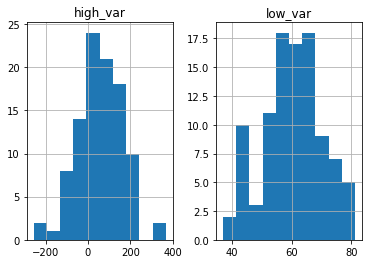

Mean of low_var and high_var:
 low_var     60.384783
high_var    60.140547
dtype: float64


In [33]:
# Take a random sample of 100 observations from each variable
# and store it in a new dataframe.
sample = pd.DataFrame()
sample['low_var'] = np.random.choice(pop['low_var'], 100)
sample['high_var'] = np.random.choice(pop['high_var'], 100)

# Again, visualize the data. Note that here we're using a pandas method to 
# create the histogram.
sample.hist()
plt.show()

# Check how well the sample replicates the population.
print("Mean of low_var and high_var:\n", sample.mean())

In [34]:
print("Standard deviation of low_var and high_var:\n", sample.std(ddof=1))

Standard deviation of low_var and high_var:
 low_var       9.972672
high_var    102.819873
dtype: float64


## Describing Data with Pandas

In [35]:
# Set up the data
data = pd.DataFrame()
data['gender'] = ['male'] * 100 + ['female'] * 100

# 100 height values for males, 100 height values for females
data['height'] = np.append(np.random.normal(69, 8, 100), np.random.normal(64, 5, 100))

# 100 weight values for males, 100 weight values for females
data['weight'] = np.append(np.random.normal(195, 25, 100), np.random.normal(166, 15, 100))

In [36]:
data.head(10)

,gender,height,weight
0,male,54.431679,211.556936
1,male,60.467202,180.946926
2,male,49.640746,180.651334
3,male,82.050235,226.602942
4,male,61.461043,155.666508
5,male,77.703022,195.161724
6,male,62.664705,237.216019
7,male,86.550845,191.848373
8,male,72.996386,205.751650
9,male,70.786594,175.828879


In [37]:
data.tail(10)

,gender,height,weight
190,female,58.114615,149.177710
191,female,59.654001,167.701548
192,female,65.636785,168.326831
193,female,65.282506,176.749326
194,female,66.061419,149.718717
195,female,68.045211,192.742661
196,female,66.986204,172.835355
197,female,64.837172,163.815204
198,female,50.708073,165.674681
199,female,60.958134,177.156099


In [38]:
data['height'].mean()

66.40962781286588

In [39]:
data['height'].std()

7.214739347533867

In [40]:
data.describe()

,height,weight
count,200.000000,200.000000
mean,66.409628,180.892085
std,7.214739,24.012324
min,48.774769,130.582945
25%,61.569769,161.988381
50%,65.659935,178.515274
75%,70.426220,195.303271
max,87.569809,255.298211


In [41]:
data.groupby('gender').describe()

height                                                        \
        count       mean       std        min        25%        50%   
gender                                                                
female  100.0  63.918295  5.042377  50.708073  60.331438  64.125210   
male    100.0  68.900961  8.164942  48.774769  63.267715  68.564758   

                             weight                                     \
              75%        max  count        mean        std         min   
gender                                                                   
female  67.261482  80.563790  100.0  165.984387  13.973488  130.582945   
male    74.512312  87.569809  100.0  195.799783  22.688776  134.423242   

                                                        
               25%         50%         75%         max  
gender                                                  
female  156.835334  164.560439  176.721548  198.775526  
male    181.207597  194.825268  209.387392  255.298211

In [42]:
data['gender'].value_counts()

male      100
female    100
Name: gender, dtype: int64

# Lesson 2 - Basics of Probability

## Perspectives on Probability

### _Frequentist_ school of thought
   - ### Describes how often a particular outcome would occur in an experiment if that experiment were repeated over and over
   - ### In general, frequentists consider _model parameters to be fixed_ and _data to be random_

### _Bayesian_ school of thought
   - ### Describes how likely an observer expects a particular outcome to be in the future, based on previous experience and expert knowledge
   - ### Each time an experiment is run, the probability is updated if the new data changes the belief about the likelihood of the outcome
   - ### The probability based on previous experiences is called the _"prior probability,"_ or the "prior," while the updated probability based on the newest experiment is called the _"posterior probability."_
   - ### In general, Bayesians consider _model parameters to be random_ and _data to be fixed_
-------------------------------------------------------------------------------------------------------------------------

## Randomness
## Sampling
## Selection Bias
-------------------------------------------------------------------------------------------------------------------------

## Independence
## Dependence
-------------------------------------------------------------------------------------------------------------------------

## Bayes' Rule
   ## $P(A|B)=\frac{P(B|A)*P(A)}{P(B)}=\frac{P(B|A)*P(A)}{[P(A)*P(B|A)+P(A\sim)*P(B|A\sim)]}$


## Conditional Probability
-------------------------------------------------------------------------------------------------------------------------

## Evaluating Data Sources
   - ## Bias
   - ## Quality
   - ## Exceptional Circumstance
-------------------------------------------------------------------------------------------------------------------------

# The Normal Distribution and the Central Limit Theorem

## Normality

## Deviations from Normality and Descriptive Statistics (skewness)

## Other Distributions
   - ## Bernoulli
   - ## Binomial
   - ## Gamma
   - ## Poisson
   - ## Conditional Distribution

## CLT and Sampling